# Exercise Six: Structured Data with Beautiful Soup and Pandas

This week, there was a directive to revisit many of the semesters' exercises, but with the power of relinquishing pulling raw HTML from a website to bringing on the structured data scraping methods to draw a dictionary of data from the web using Beautiful Soup, then parse and display it using Pandas.

## Stage One - Import the libraries and Scrape Structured Data from Multiple Pages¶

Even with the separation spread, the URL order allowed for scraping ease toward gaining the value of structured data from each chosen resource.  It was interesting to draw to visually have the mode of comparison by encasing the process of housing each research perspective and reference as its own.  There is also experimentation toward finding associated examples within the same library that would have similarities in coding parallels to help avoid dissimilarities—working with the HTML files allowed for the ease of introduction and import with BeatifulSoup within the Pandas interplay.

In [320]:
#import libraries and set up the scraping target
import requests
from bs4 import BeautifulSoup
import pandas as pd

urls = ['http://digitalhumanities.org:8081/dhq/vol/14/4/000499/000499.html', 'http://digitalhumanities.org:8081/dhq/vol/14/4/000532/000532.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000518/000518.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000498/000498.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000518/000518.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000497/000497.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000495/000495.html''http://digitalhumanities.org:8081/dhq/vol/14/4/000500/000500.html''http://digitalhumanities.org:8081/dhq/vol/14/4/000528/000528.html']

user_agent = {'User-agent': 'Mozilla/5.0'}

## Stage Two: Define an Empty Dictionary Reflecting the Data Categories

Initially, it became enforceable to foster the most prevalent areas that were more locatable and easily defined.  The Article Dictionary component moved forward using identifiable avenues of title, first_author, issue, and abstract.


In [321]:

article_dict = {'title':[], 'first_author':[], 'issue':[], 'abstract':[], 'start':[], 'logo':[]}

## Stage Three: Loop through and Store Structured Data

Bringing in the force of looping within stored structure data was enabled by scraping the content within the URL toward the articles dictionary. As a result, the journey of looping within the trail of URLs introduced became an adventure of specifics and attention to detail to see if commonalities matched between the references to succeed.

 article_dict['year'].append(article.find('div', id_='2020').find('$0').text)
 print(article_dict['year'])

 

In [322]:
for url in urls:

    response = requests.get(url, headers = user_agent)
    article = BeautifulSoup(response.text, 'html.parser')

    article_dict['title'].append(article.find('h1', class_='articleTitle lang en').text)
    article_dict['first_author'].append(article.find('div', class_='author').find('a').text)
    article_dict['issue'].append(article.find('div', class_='toolbar').find('a').text)
    article_dict['abstract'].append(article.find('div', id='abstract').find('p').text)
    article_dict['start'].append(article.find('h1', class_='head').text)
    article_dict['logo'].append(article.find('img', style='max-width:200px;float:right;').text)
    
    
    
print(article_dict['title'])
print(article_dict['first_author'])
print(article_dict['issue'])
print(article_dict['abstract'])
print(article_dict['start'])
print(article_dict['logo'])


['The Voices of Doctor Who â\x80\x93 How Stylometry Can be\n               Useful in Revealing New Information About TV Series', 'Film and Video Analysis in the Digital Humanities â\x80\x93\n               An Interdisciplinary Dialog', 'Automated Visual Content Analysis for Film Studies:\n               Current Status and Challenges', 'The Stylometry of Film Dialogue: Pros and\n               Pitfalls', 'Automated Visual Content Analysis for Film Studies:\n               Current Status and Challenges', 'Exploring Digitised Moving Image Collections: The\n               SEMIA Project, Visual Analysis and the Turn to Abstraction', 'The Phenomenon of Interwar City\n                              Symphonies: A Combined Methodology of Digital Tools and Traditional\n                              Film Analysis Methods to Study Visual Motifs and Structural Patterns\n                              of Experimental-Documentary City Films']
['Joanna Byszuk\n               ', 'Manuel Burghardt\n      

## Stage Four: Convert from Dictionary to DataFrame and Display¶

Converting  Dictionary to DataFrame enabled the areas of interest and attention to be more organized within the displayed objectives.  Which helps the researcher focus on data and material that may be beneficial to their research and access of interest.¶

In [323]:
articles = pd.DataFrame(article_dict)
pd.set_option("display.max_colwidth", None)

articles

,title,first_author,issue,abstract,start,logo
0,The Voices of Doctor Who â How Stylometry Can be\n Useful in Revealing New Information About TV Series,Joanna Byszuk\n,2020 14.4,"This article presents possibilities of effectively using stylometric methods popular\n in the analysis of literary texts in the study of texts written for television, on\n the example of Doctor Who. The article examines the changes driving the development\n of the show moving from character-oriented in the so-called âClassic Whoâ\n (1963-1989) to showrunner-oriented in its revival started in 2005. It also seeks to\n describe stability of the characterization of the protagonist as evidenced in the\n dialogues, and to discuss authorial relations between showrunners and their teams.",Introduction[1],
1,Film and Video Analysis in the Digital Humanities â\n An Interdisciplinary Dialog,Manuel Burghardt\n,2020 14.4,"This editorial introduces the special issue on âDigital Humanities & Film Studies: Analyzing the Modalities of Moving Images,â which contains a total of eight exciting contributions. Moreover, this editorial aims to highlight the complementary disciplinary perspectives on the computer-aided analysis of moving images, which are important prerequisites to better understand and situate a common DH perspective",1. The Infrastructural Perspective: GLAM Institutions and Film Archives,
2,Automated Visual Content Analysis for Film Studies:\n Current Status and Challenges,Kader Pustu-Iren\n,2020 14.4,"Lots of approaches for automated video analysis have been suggested since the\n 1990ies, which have the potential to support quantitative and qualitative analysis in\n film studies. However, software solutions for the scholarly study of film that\n utilise video analysis algorithms are still relatively rare. In this paper, we aim to\n provide an overview of related work in this field, review current developments in\n computer vision, compare machine and human performance for some visual recognition\n tasks, and outline the requirements for video analysis software that would optimally\n support scholars of film studies.",1 Introduction,
3,The Stylometry of Film Dialogue: Pros and\n Pitfalls,Agata HoÅobut\n,2020 14.4,"We examine film dialogue with quantitative textual analysis (stylometry, sentiment\n analysis, distant reading). Working with transcribed dialogue in almost 300\n productions, we explore the complex way in which most-frequent-words-based stylometry\n and lexicon-based sentiment analysis produce patterns of similarity and difference\n between screenwriters and/or a priori IMDB-defined genres. In fact, some of our\n results show that counting and comparing very frequent word lists reveals further\n similarities: of theme, implied audience, stylistic patternings. The results are\n encouraging enough to suggest that such quantitative approach to film dialogue may\n become a welcome addition to the arsenal of film studies methodology.",Film dialogue,
4,Automated Visual Content Analysis for Film Studies:\n Current Status and Challenges,Kader Pustu-Iren\n,2020 14.4,"Lots of approaches for automated video analysis have been suggested since the\n 1990ies, which have the potential to support quantitative and qualitative analysis in\n film studies. However, software solutions for the scholarly study of film that\n utilise video analysis algorithms are still relatively rare. In this paper, we aim to\n provide an overview of related work in this field, review current developments in\n computer vision, compare machine and human performance for some visual recognition\n tasks, and outline the requirements for video analysis software that would optimally\n support scholars of film studies.",1 Introduction,
5,"Exploring Digitised Moving Image Collections: The\n SEMIA Project, Visual Analysis and the Turn to Abstraction",Eef Masson\n,2020 14.4,"In recent years, efforts to unlock digitized moving image collections have focused\n primarily on the retriev

## Stage Five: Plot some Aspect of the Data¶

In this stage, plotting many areas and aspects of Data displayed and of interest helps streamline the information even further, in an almost artistic way to present digits corresponding with text.¶

In [324]:
from collections import Counter

word_bag = Counter()
articles['abstract'].str.lower().str.split().apply(word_bag.update)
print(word_bag)

Counter({'the': 50, 'of': 40, 'and': 31, 'in': 26, 'to': 18, 'a': 16, 'analysis': 15, 'film': 15, 'this': 13, 'for': 10, 'on': 9, 'which': 9, 'are': 8, 'have': 8, 'that': 8, 'as': 7, 'city': 7, 'video': 6, 'moving': 5, 'software': 5, 'with': 5, 'digital': 5, 'study': 4, 'it': 4, 'their': 4, 'been': 4, 'support': 4, 'quantitative': 4, 'studies.': 4, 'we': 4, 'visual': 4, 'or': 4, 'by': 4, 'they': 4, 'can': 4, 'article': 3, 'its': 3, 'also': 3, 'scholarly': 3, 'still': 3, 'an': 3, 'some': 3, 'dialogue': 3, 'how': 3, 'films': 3, 'canonical': 3, 'symphony': 3, 'methods': 2, 'texts': 2, 'show': 2, 'protagonist': 2, 'between': 2, 'editorial': 2, 'moreover,': 2, 'lots': 2, 'approaches': 2, 'automated': 2, 'suggested': 2, 'since': 2, '1990ies,': 2, 'potential': 2, 'qualitative': 2, 'however,': 2, 'solutions': 2, 'utilise': 2, 'algorithms': 2, 'relatively': 2, 'rare.': 2, 'paper,': 2, 'aim': 2, 'provide': 2, 'overview': 2, 'related': 2, 'work': 2, 'field,': 2, 'review': 2, 'current': 2, 'develo

As a result, the words from the attained (above) coded data resource is readily displayed within the word_bag highlighting the most common or popularity discovered through the use of their indicated even previously visualized with value within their captured mode dh_counts.

<BarContainer object of 15 artists>

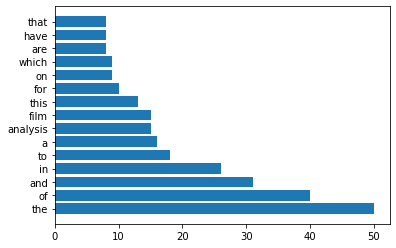

In [325]:

dh_words, dh_counts = zip(*word_bag.most_common(15))

import matplotlib.pyplot as plt
plt.barh(dh_words, dh_counts)

## Bonus Stage: Add On





- Iterating through multiple pages (all the pages of a database, for instance)

- Visualizing using another method from our discussion or readings

- Storing your data and / or visualization for external analysis


<BarContainer object of 10 artists>

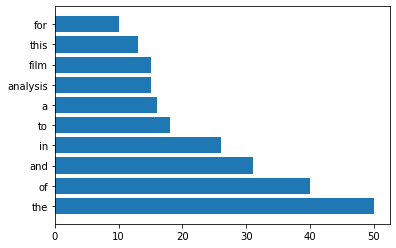

In [326]:

dh_words, dh_counts = zip(*word_bag.most_common(10))

import matplotlib.pyplot as plt
plt.barh(dh_words, dh_counts)


# Importing the required libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

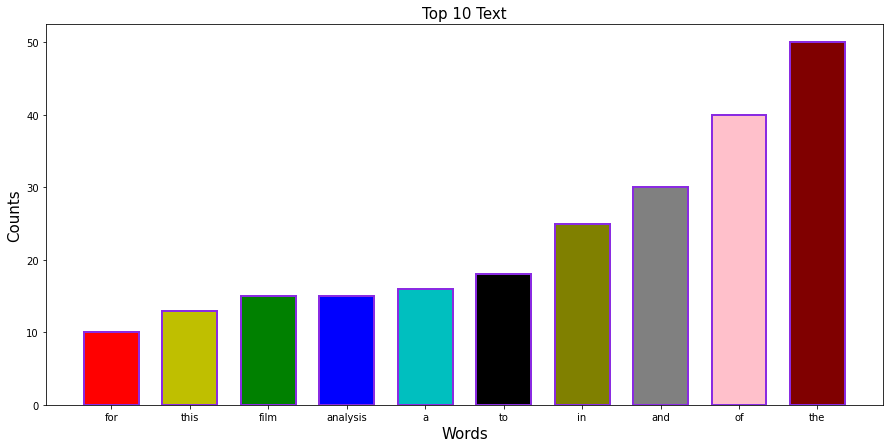

<Figure size 1080x504 with 0 Axes>

In [327]:
# Preparing the data to plot
words = ['for', 'this','film', 'analysis', 'a', 'to', 
           'in', 'and', 'of', 
           'the'] 
counts = [10, 13, 15, 15, 16, 18, 25, 30, 40, 50]


plt.figure(figsize=[15, 7])

# Creating a bar chart with bars of different color
plt.bar(words, counts, width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')



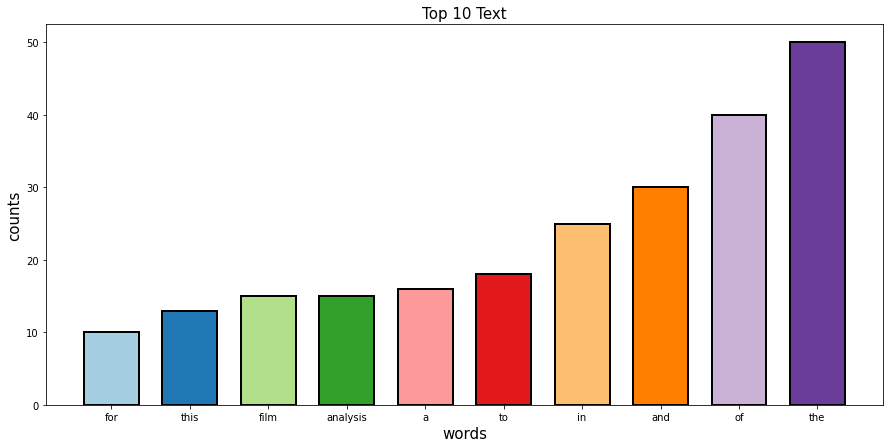

In [328]:
plt.figure(figsize=[15, 7])

# Creating a bar chart with bars of different color
plt.bar(words, counts, width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

# Creating a bar chart with bars of different color using colormap
plt.bar(words, counts, width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('words', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

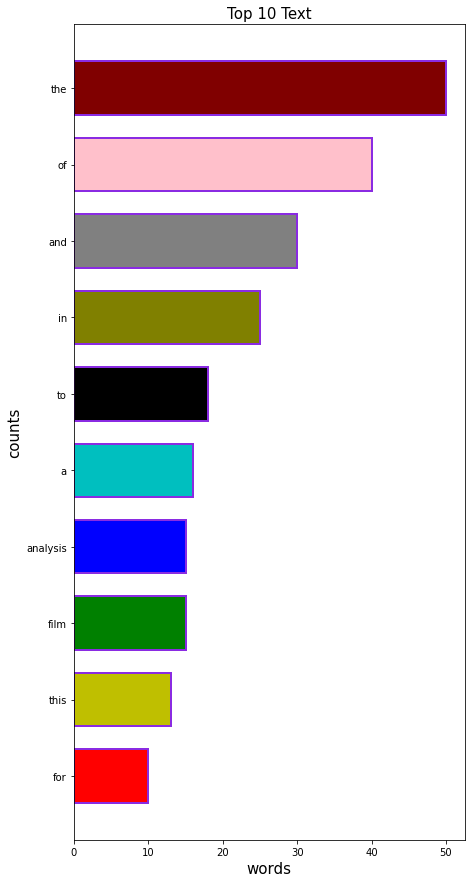

In [329]:
# Importing the required libraries
from matplotlib import pyplot as plt

# Preparing the data to plot
words = ['for', 'this','film', 'analysis', 'a', 'to', 
           'in', 'and', 'of', 
           'the'] 
total = [10, 13, 15, 15, 16, 18, 25, 30, 40, 50]

plt.figure(figsize=[7,15])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color
plt.barh(words, counts, height=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Top 10 Text', fontsize=15)
plt.xlabel('words', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show() 




